### FP-Growth is an algorithm for extracting frequent itemsets with applications in association rule learning that emerged as a popular alternative to the established Apriori algorithm.

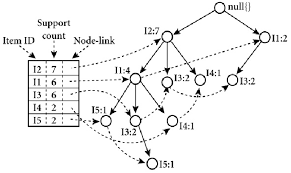

In [1]:

from IPython.display import Image
Image('/home/adish/Downloads/fptree.png')

### In particular, and what makes it different from the Apriori frequent pattern mining algorithm, FP-Growth is an frequent pattern mining algorithm that does not require candidate generation. Internally, it uses a so-called FP-tree (frequent pattern tree) datastrucure without generating the candidate sets explicitely, which makes it particularly attractive for large datasets.

## TransactionEncoder

- Encoder class for transaction data in Python lists
- Encodes database transaction data in form of a Python list of lists into a NumPy array.
- Using TransactionEncoder object, we can transform this dataset into an array format suitable for typical machine learning APIs. Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array.


In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False, False, False,  True, False,  True,  True,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True,  True,
        False,  True],
       [ True, False, False,  True, False,  True,  True, False, False,
        False, False],
       [False,  True, False, False, False,  True,  True, False, False,
         True,  True],
       [False,  True, False,  True,  True,  True, False, False,  True,
        False, False]])

- - After fitting, the unique column names that correspond to the data array shown above can be accessed via the columns_ attribute:

In [4]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [6]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.6) # return the items and itemsets with at least 60% support:

,support,itemsets
0,1.0,(5)
1,0.8,(3)
2,0.6,(10)
3,0.6,(8)
4,0.6,(6)
5,0.8,"(3, 5)"
6,0.6,"(10, 5)"
7,0.6,"(8, 3)"
8,0.6,"(8, 5)"
9,0.6,"(8, 3, 5)"


- By default, fpgrowth returns the column indices of the items

- For better readability, we can set use_colnames=True to convert these integer values into the respective item names:

In [7]:
fpgrowth(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Yogurt, Kidney Beans)"
7,0.6,"(Onion, Eggs)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Onion, Eggs, Kidney Beans)"
